In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with WMF model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.wmf import WMF

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = WMF

L2 = [10 ** p for p in range(1, 5)]
ALPHA = [10 ** p for p in range(0, 4)]
# L2 = [50, 100, 200, 500]
# ALPHA = [5, 10, 20, 50]
T = [100, 200, 300]
MAX_ITER = 20
HYPERPARAMS = {'l2': L2, 'alpha': ALPHA, 'max_iterations': MAX_ITER, 't': T}
HYPERPARAMS

{'l2': [10, 100, 1000, 10000],
 'alpha': [1, 10, 100, 1000],
 'max_iterations': 20,
 't': [100, 200, 300]}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
# HYPERPARAMS['t'] = t
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.239
Average Recall@100 0.369
Average nDCG@100 0.153
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.026
Average Recall@100 0.067
Average nDCG@100 0.016
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.008
Average Recall@100 0.028
Average nDCG@100 0.006
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.001
Average Recall@100 0.011
Average nDCG@100 0.002
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.411
Average Recall@100 0.594
Average nDCG@100 0.262
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.231
Average Recall@100 0.364
Average nDCG@100 0.151
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.025
Average Recall@100 0.066
Average nDCG@100 0.016
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.0
Average Recall@100 0.007
Average nDCG@100 0.001
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.49
Average Recall@100 0.701
Average nDCG@100 0.306
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.481
Average Recall@100 0.688
Average nDCG@100 0.3
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.175
Average Recall@100 0.308
Average nDCG@100 0.117
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.029
Average Recall@100 0.068
Average nDCG@100 0.017
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.49
Average Recall@100 0.686
Average nDCG@100 0.309
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.483
Average Recall@100 0.68
Average nDCG@100 0.307
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.482
Average Recall@100 0.699
Average nDCG@100 0.296
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 1000 users
Average Recall@20 0.066
Average Recall@100 0.131
Average nDCG@100 0.039
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.252
Average Recall@100 0.388
Average nDCG@100 0.164
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.026
Average Recall@100 0.061
Average nDCG@100 0.016
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.004
Average Recall@100 0.018
Average nDCG@100 0.006
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.002
Average Recall@100 0.008
Average nDCG@100 0.002
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.467
Average Recall@100 0.636
Average nDCG@100 0.292
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.231
Average Recall@100 0.368
Average nDCG@100 0.152
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.026
Average Recall@100 0.069
Average nDCG@100 0.018
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.0
Average Recall@100 0.003
Average nDCG@100 0.001
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.517
Average Recall@100 0.697
Average nDCG@100 0.327
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.519
Average Recall@100 0.709
Average nDCG@100 0.327
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.175
Average Recall@100 0.311
Average nDCG@100 0.119
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.035
Average Recall@100 0.074
Average nDCG@100 0.02
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.497
Average Recall@100 0.681
Average nDCG@100 0.305
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.506
Average Recall@100 0.701
Average nDCG@100 0.327
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.507
Average Recall@100 0.706
Average nDCG@100 0.31
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 200}



Evaluating with 1000 users
Average Recall@20 0.066
Average Recall@100 0.13
Average nDCG@100 0.039
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.253
Average Recall@100 0.391
Average nDCG@100 0.165
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.029
Average Recall@100 0.062
Average nDCG@100 0.016
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.004
Average Recall@100 0.019
Average nDCG@100 0.004
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.002
Average Recall@100 0.007
Average nDCG@100 0.002
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.479
Average Recall@100 0.652
Average nDCG@100 0.304
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.233
Average Recall@100 0.371
Average nDCG@100 0.152
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.023
Average Recall@100 0.063
Average nDCG@100 0.017
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.0
Average Recall@100 0.002
Average nDCG@100 0.001
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.521
Average Recall@100 0.691
Average nDCG@100 0.33
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.525
Average Recall@100 0.7
Average nDCG@100 0.331
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.174
Average Recall@100 0.311
Average nDCG@100 0.119
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.032
Average Recall@100 0.079
Average nDCG@100 0.023
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.485
Average Recall@100 0.662
Average nDCG@100 0.295
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.507
Average Recall@100 0.694
Average nDCG@100 0.324
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.51
Average Recall@100 0.712
Average nDCG@100 0.316
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.07
Average Recall@100 0.134
Average nDCG@100 0.04



In [9]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.3312434579907048 achieved with {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 300}."

## Evaluate model with optimal hyperparams on test set

In [10]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)


CPU times: user 1min 33s, sys: 2min 2s, total: 3min 35s
Wall time: 10.8 s


In [11]:
%%time
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set



Evaluating with 1500 users
Average Recall@20 0.524
Average Recall@100 0.706
Average nDCG@100 0.336
CPU times: user 12.1 s, sys: 186 ms, total: 12.3 s
Wall time: 7.06 s


## Plot amount of items from long tail recommended

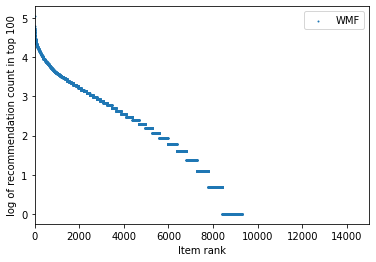

In [12]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["WMF"], k=100)